In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/ParisHousingClass123.csv')

In [ ]:
dataset

,squareMeters,numberOfRooms,hasYard,hasPool,isNewBuilt
0,75523,3,0,1,0
1,80771,39,1,1,1
2,55712,58,0,1,0
3,32316,47,0,0,0
4,70429,19,1,1,1
...,...,...,...,...,...
9995,1726,89,0,1,0
9996,44403,29,1,1,0
9997,83841,3,0,0,1
9998,59036,70,0,0,0


In [ ]:
x=dataset[['squareMeters','numberOfRooms','hasYard','hasPool']]

In [ ]:
y=dataset[['isNewBuilt']]

In [ ]:
x

,squareMeters,numberOfRooms,hasYard,hasPool
0,75523,3,0,1
1,80771,39,1,1
2,55712,58,0,1
3,32316,47,0,0
4,70429,19,1,1
...,...,...,...,...
9995,1726,89,0,1
9996,44403,29,1,1
9997,83841,3,0,0
9998,59036,70,0,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,squareMeters,numberOfRooms,hasYard,hasPool
8582,46195,68,0,1
3522,18014,85,1,1
4227,70277,90,0,1
146,16899,19,0,1
3323,54901,65,0,1
...,...,...,...,...
9435,62770,46,0,0
6169,28193,61,1,0
1280,3479,15,0,0
1221,2930,61,1,0


In [ ]:
x_test

,squareMeters,numberOfRooms,hasYard,hasPool
7250,26258,22,1,1
5716,40266,100,0,1
4286,93615,68,1,0
5865,56223,42,1,1
1639,86276,45,1,0
...,...,...,...,...
5020,1090,30,1,1
8923,39132,30,1,1
9713,63533,57,1,0
9235,81974,86,1,0


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear',random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm=confusion_matrix(y_test,model.predict(x_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
ac=accuracy_score(y_test,model.predict(x_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
cr=classification_report(y_test,model.predict(x_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

In [ ]:
print(cm)
print(ac)
print(cr)

[[521 466]
 [564 449]]
0.4935
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       987
           1       0.00      0.00      0.00      1013

    accuracy                           0.49      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.24      0.49      0.33      2000



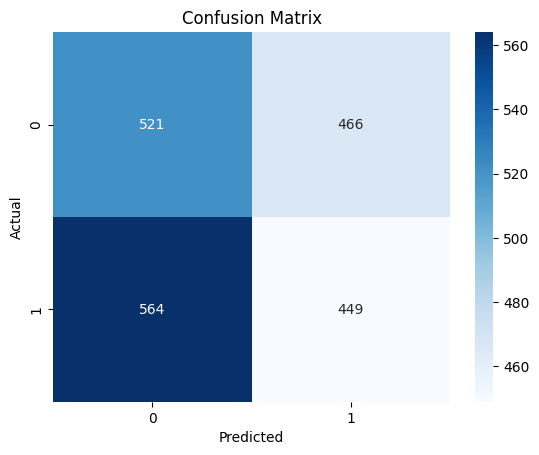

In [ ]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()